<a href="https://colab.research.google.com/github/swapnilsethi/Stat-5000/blob/main/Feature_Engg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [56]:
#read train data from github
URL = "https://raw.githubusercontent.com/swapnilsethi/Stat-5000/master/train.csv"
#data = pd.read_csv('train.csv')
data = pd.read_csv(URL)

In [57]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
#read test data from github
test_URL = "https://raw.githubusercontent.com/swapnilsethi/Stat-5000/master/test.csv"

#test_data = pd.read_csv('test.csv')
test_data = pd.read_csv(test_URL)

In [59]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


I'm merging the test and train datasets for feature Engg because I want to apply the same modification/preprocessing on the test data on which the model is trained.

In [60]:
data = pd.concat([data,test_data])
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


We don't have values for SalePrice(dependent Variable) in test data, hence this column will have Null values.

In [61]:
data = data.drop(['MiscFeature','PoolQC', 'Alley','Fence'], 1) #drop columns having 50% or more null values 

In [62]:
data = data.drop(['Id'], 1) #We do not need this column for our Feature Engg, hence I am dropping it.

Now, As we saw in EDA Categorical features have multiple null values, in this section we will try to handle those null values

In [63]:
cat_feature_nan_values = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtype == 'object']
for feature in cat_feature_nan_values:
    print(feature + ' contains ' + str(np.round(data[feature].isnull().mean()*100,4))+ '% null values')

MSZoning contains 0.137% null values
Utilities contains 0.0685% null values
MasVnrType contains 0.8222% null values
BsmtQual contains 2.7749% null values
BsmtCond contains 2.8092% null values
BsmtExposure contains 2.8092% null values
BsmtFinType1 contains 2.7064% null values
BsmtFinType2 contains 2.7407% null values
Functional contains 0.0685% null values
FireplaceQu contains 48.6468% null values
GarageType contains 5.3786% null values
GarageFinish contains 5.4471% null values
GarageQual contains 5.4471% null values
GarageCond contains 5.4471% null values


First, We will replace all null values in Categorical features to 'Missing'

In [64]:
#replace nan values with 'missing' label
def replace_nan_values(data, feature):
    dataset = data.copy()
    dataset[feature] = dataset[feature].fillna('missing')
    return dataset
data = replace_nan_values(data, cat_feature_nan_values)
data[cat_feature_nan_values].isnull().sum()


MSZoning        0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

By replacing 'nan' values with the new label 'missing,' I was able to train my model. (After completing all of the steps below.) I was able to get an accuracy of 85 percent. Now I'm going to try a different approach to dealing with null data and double-check the results.

Instead of labeling all missing values with the word "missing," I'm attempting to replace them with the most common value in feature.

Remember that in EDA, we created a bar graph indicating the number of sub-categories in each category.

In [65]:
#for feature in cat_feature_nan_values:
    #most_frequent_sub_category = data[feature].mode()[0]
    #print(most_frequent_sub_category)
    #data[feature].fillna(most_frequent_sub_category, inplace = True)
#data[cat_feature_nan_values].isnull().sum()

Model accuracy declined to 75.6 percent with this approach. As a result, I chose to stick with the old strategy. Replacing each feature with Mode might not be the best strategy.

Future scope: I'll go over each feature one by one and try to comprehend them, then change nan values with other values if necessary.

Now, let's move towards numerical values.

In [66]:
num_feature_nan_values = [feature for feature in data.columns if data[feature].isnull().sum()>=1 and data[feature].dtype != 'object' and feature !='SalePrice']
for feature in num_feature_nan_values:
    print(feature + ' contains ' + str(np.round(data[feature].isnull().mean()*100,4))+ '% null values')

LotFrontage contains 16.6495% null values
MasVnrArea contains 0.7879% null values
BsmtFinSF1 contains 0.0343% null values
BsmtFinSF2 contains 0.0343% null values
BsmtUnfSF contains 0.0343% null values
TotalBsmtSF contains 0.0343% null values
BsmtFullBath contains 0.0685% null values
BsmtHalfBath contains 0.0685% null values
GarageYrBlt contains 5.4471% null values
GarageCars contains 0.0343% null values
GarageArea contains 0.0343% null values


I opted to just replace all nan values with median values for numerical attributes. If a different appprcoh is required in a feature, I will test it.

We can't replace nan values with mean values because, as we observed in EDA, most numerical features are not normally distributed.

I've introduced a new column called 'feature_nan' to keep track of where null values in numerical data appeared. This will aid me in tracking down null values rows in the future if necessary.

In [67]:
for feature in num_feature_nan_values:
    median = data[feature].median()
    data[feature+'_nan'] = np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median,inplace =True)
data[num_feature_nan_values].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

Now, let's look at temporal variables. As we all know, the age of a house is a significant factor in determining its price. So we'll figure out how much time has passed till house sold since the house was built, remodeled.

In [68]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    data[feature] = data['YrSold'] - data[feature]

In [69]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0,0,0,0,0,0


I attempted some scaling and normalization transformations, but I am excluding these procedures from my Feature Engg. for the time being.

In [ ]:
#num_feature_with_zero_value = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']   #Not following normal distribution
#for feature in num_feature_with_zero_value:
   # data[feature] = np.log(data[feature])


In [70]:
#data.head()

Let's take a look at some uncommon category features and see if we can replace them with different values.

In [71]:
cat_feature = [feature for feature in data.columns if data[feature].dtype == 'object' ]

In [72]:
for feature in cat_feature:
    temp = data.groupby(feature)['SalePrice'].count()/len(data) 
    #print(temp)
    temp_df = temp[temp>0.01].index
    data[feature] = np.where(data[feature].isin(temp_df), data[feature],'rare_val') 
    # If values are less tahn 1 percent then I am replacing them with new label 'rare_val'
#data.head(50)

Now, let's convert our categorical values to numerical values to train our model 

In [73]:
for feature in cat_feature:
    labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
    #print(labels_ordered)
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In the future, I'll experiment with different techniques to dealing with categorical values, as described in the article below, and test model performance.

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [74]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,60,2,65.0,8450,1,0,1,1,0,0,11,2,1,4,5,7,5,5,5,0,0,6,6,2,196.0,2,2,3,3,3,1,6,706.0,4,0.0,150.0,856.0,1,4,1,2,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,3,0,0,3,5.0,2,2.0,548.0,2,3,2,0,61,0,0,0,0,0,2,2008,2,2,208500.0,0,0,0,0,0,0,0,0,0,0,0
1,20,2,80.0,9600,1,0,1,1,1,0,8,1,1,4,4,6,8,31,31,0,0,1,1,0,0.0,1,2,2,3,3,4,4,978.0,4,0.0,284.0,1262.0,1,4,1,2,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,3,1,2,3,31.0,2,2.0,460.0,2,3,2,298,0,0,0,0,0,0,5,2007,2,2,181500.0,0,0,0,0,0,0,0,0,0,0,0
2,60,2,68.0,11250,1,1,1,1,0,0,11,2,1,4,5,7,5,7,6,0,0,6,6,2,162.0,2,2,3,3,3,2,6,486.0,4,0.0,434.0,920.0,1,4,1,2,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,3,1,2,3,7.0,2,2.0,608.0,2,3,2,0,42,0,0,0,0,0,9,2008,2,2,223500.0,0,0,0,0,0,0,0,0,0,0,0
3,70,2,60.0,9550,1,1,1,1,2,0,12,2,1,4,5,7,5,91,36,0,0,2,2,0,0.0,1,2,1,2,4,1,4,216.0,4,0.0,540.0,756.0,1,3,1,2,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,3,1,3,1,8.0,1,3.0,642.0,2,3,2,0,35,272,0,0,0,0,2,2006,2,0,140000.0,0,0,0,0,0,0,0,0,0,0,0
4,60,2,84.0,14260,1,1,1,1,1,0,16,2,1,4,5,8,5,8,8,0,0,6,6,2,350.0,2,2,3,3,3,3,6,655.0,4,0.0,490.0,1145.0,1,4,1,2,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,3,1,2,3,8.0,2,3.0,836.0,2,3,2,192,84,0,0,0,0,0,12,2008,2,2,250000.0,0,0,0,0,0,0,0,0,0,0,0


To the best of my knowledge, we've dealt with all null values in all features, but let's double-check with the help of a heat map.

In [75]:
num_feature = [feature for feature in data.columns if data[feature].dtype != 'object' ]

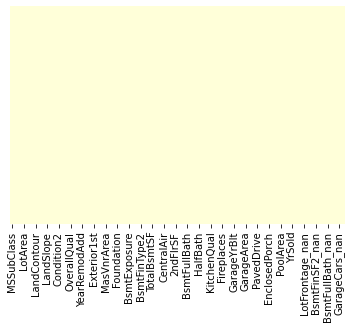

In [76]:
temp = data.copy()
temp = temp.drop(['SalePrice'], axis=1)
sns.heatmap(temp.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

Everything looks okay.

I tried experimenting with feature scaling, but it requires more work, so I'll revisit this in the future.

Feature Scaling

In [ ]:
#feature_scale = [feature for feature in data.columns if feature not in ['Id','SalePrice']]


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
##scaler = MinMaxScaler()
#scaler.fit(data[feature_scale])

In [ ]:
#dataset = pd.concat([data[['Id', 'SalePrice']].reset_index(drop=True),
                    #pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    #axis=1)

In [ ]:
#dataset.head()

All null values have been handled, and category features have been transformed to numerical features. I am aware that there are other areas in which I can improve, but I will return to this section after training and testing the model.

As before, divide the data into training and testing datasets.

In [77]:
train_data = data.iloc[:1460,:]
test_data = data.iloc[1460:,:]

In [78]:
train_data.shape

(1460, 87)

In [79]:
test_data.shape

(1459, 87)

In [80]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,60,2,65.0,8450,1,0,1,1,0,0,11,2,1,4,5,7,5,5,5,0,0,6,6,2,196.0,2,2,3,3,3,1,6,706.0,4,0.0,150.0,856.0,1,4,1,2,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,3,0,0,3,5.0,2,2.0,548.0,2,3,2,0,61,0,0,0,0,0,2,2008,2,2,208500.0,0,0,0,0,0,0,0,0,0,0,0
1,20,2,80.0,9600,1,0,1,1,1,0,8,1,1,4,4,6,8,31,31,0,0,1,1,0,0.0,1,2,2,3,3,4,4,978.0,4,0.0,284.0,1262.0,1,4,1,2,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,3,1,2,3,31.0,2,2.0,460.0,2,3,2,298,0,0,0,0,0,0,5,2007,2,2,181500.0,0,0,0,0,0,0,0,0,0,0,0
2,60,2,68.0,11250,1,1,1,1,0,0,11,2,1,4,5,7,5,7,6,0,0,6,6,2,162.0,2,2,3,3,3,2,6,486.0,4,0.0,434.0,920.0,1,4,1,2,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,3,1,2,3,7.0,2,2.0,608.0,2,3,2,0,42,0,0,0,0,0,9,2008,2,2,223500.0,0,0,0,0,0,0,0,0,0,0,0
3,70,2,60.0,9550,1,1,1,1,2,0,12,2,1,4,5,7,5,91,36,0,0,2,2,0,0.0,1,2,1,2,4,1,4,216.0,4,0.0,540.0,756.0,1,3,1,2,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,3,1,3,1,8.0,1,3.0,642.0,2,3,2,0,35,272,0,0,0,0,2,2006,2,0,140000.0,0,0,0,0,0,0,0,0,0,0,0
4,60,2,84.0,14260,1,1,1,1,1,0,16,2,1,4,5,8,5,8,8,0,0,6,6,2,350.0,2,2,3,3,3,3,6,655.0,4,0.0,490.0,1145.0,1,4,1,2,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,3,1,2,3,8.0,2,3.0,836.0,2,3,2,192,84,0,0,0,0,0,12,2008,2,2,250000.0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,20,0,80.0,11622,1,0,1,1,0,0,5,1,1,4,4,5,6,49,49,0,0,6,6,0,0.0,1,2,2,2,3,1,1,468.0,2,144.0,270.0,882.0,1,2,1,2,896,0,0,896,0.0,0.0,1,0,2,1,1,5,3,0,0,3,49.0,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,6,2010,2,2,NaN,0,0,0,0,0,0,0,0,0,0,0
1,20,2,81.0,14267,1,1,1,1,2,0,5,2,1,4,4,6,6,52,52,2,0,2,0,2,108.0,1,2,2,2,3,1,4,923.0,4,0.0,406.0,1329.0,1,2,1,2,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,3,0,0,3,52.0,1,1.0,312.0,2,3,2,393,36,0,0,0,0,12500,6,2010,2,2,NaN,0,0,0,0,0,0,0,0,0,0,0
2,60,2,74.0,13830,1,1,1,1,0,0,10,2,1,4,5,5,5,13,12,0,0,6,6,0,0.0,1,2,3,3,3,1,6,791.0,4,0.0,137.0,928.0,1,3,1,2,928,701,0,1629,0.0,0.0,2,1,3,1,1,6,3,1,2,3,13.0,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,3,2010,2,2,NaN,0,0,0,0,0,0,0,0,0,0,0
3,60,2,78.0,9978,1,1,1,1,0,0,10,2,1,4,5,6,6,12,12,0,0,6,6,2,20.0,1,2,3,2,3,1,6,602.0,4,0.0,324.0,926.0,1,4,1,2,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,3,1,3,3,12.0,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,6,2010,2,2,NaN,0,0,0,0,0,0,0,0,0,0,0
4,120,2,43.0,5005,1,1,3,1,0,0,8,2,1,3,4,8,5,18,18,0,0,3,4,0,0.0,2,2,3,3,3,1,4,263.0,4,0.0,1017.0,1280.0,1,4,1,2,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,3,0,0,3,18.0,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,1,2010,2,2,NaN,0,0,0,0,0,0,0,0,0,0,0


In [82]:
test_data = test_data.drop(['SalePrice'], axis =1)

Generating files for model traning.

In [ ]:
from google.colab import files
train_data.to_csv('X_train.csv')
files.download('X_train.csv')

In [ ]:
test_data.to_csv('X_test.csv')
files.download('X_test.csv')

I have uploaded both files on Github for future use.